# Empirical analysis of performance data


Statistical tests and basic models to interpret our results !

Total : 90 subjects
89 subjects remaining after removing problematic subjects.
A total of 1557/9790 actions were missed. (15.90 %)
(89, 3)


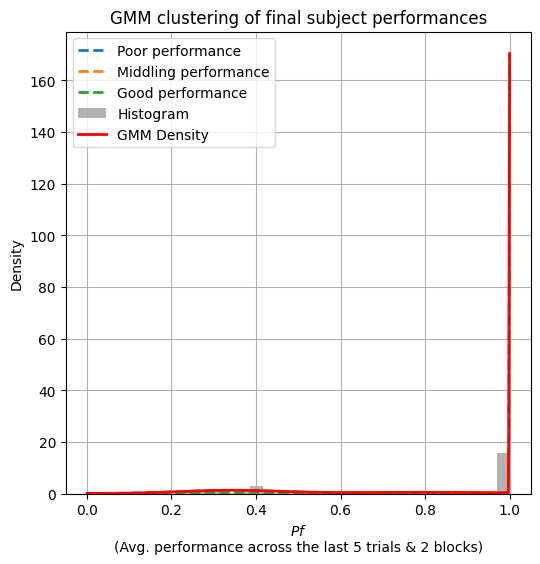

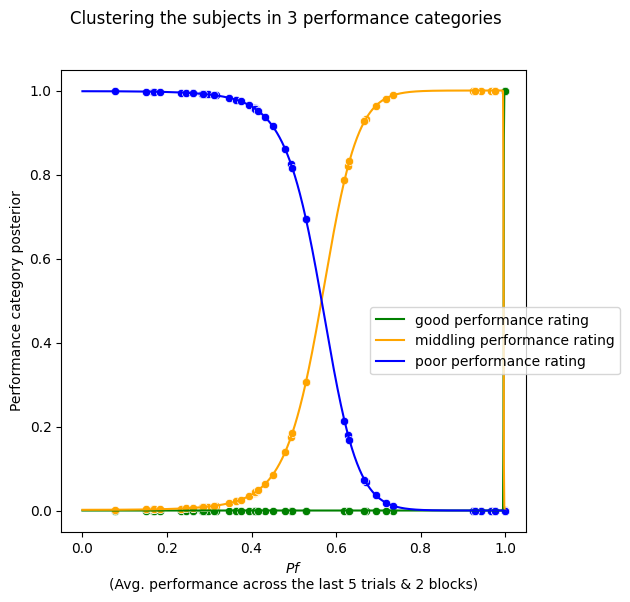

c:\Users\annic\OneDrive\Bureau\MainPhD\code\behavioural_exp_code\analysis_tools\dataframe_from_raw_data.py:348: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


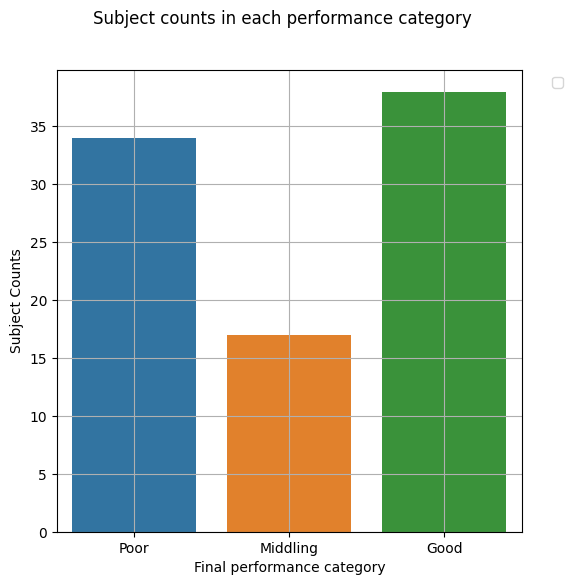

 - Loaded the task results for study 66f96c31e69227986334a027 
    (16 subjects.)
 - Loaded the task results for study 66d086503c0a69291c361b67 
    (40 subjects.)
Total : 56 subjects
55 subjects remaining after removing problematic subjects.
A total of 14/6050 actions were missed. (0.23 %)
 - Loaded the task results for study 6703ab18d345eaa4893587e0 
    (49 subjects.)
 - Loaded the task results for study 66f9aee8210357265a5958fc 
    (50 subjects.)
 - Loaded the task results for study 6703ab1a7ea30557549dc6da 
    (50 subjects.)
Total : 149 subjects
145 subjects remaining after removing problematic subjects.
A total of 33/15950 actions were missed. (0.21 %)
(200, 3)


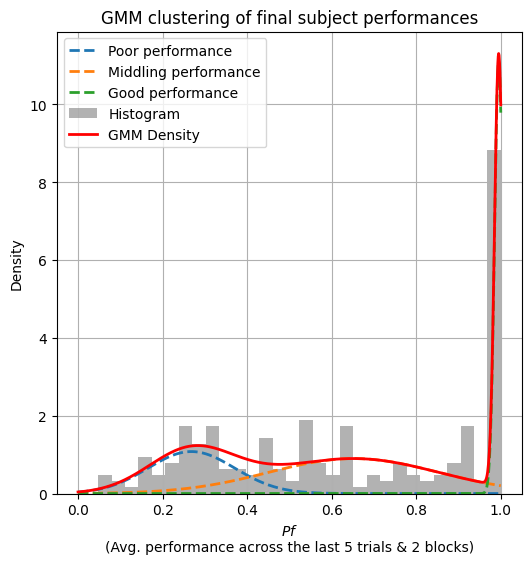

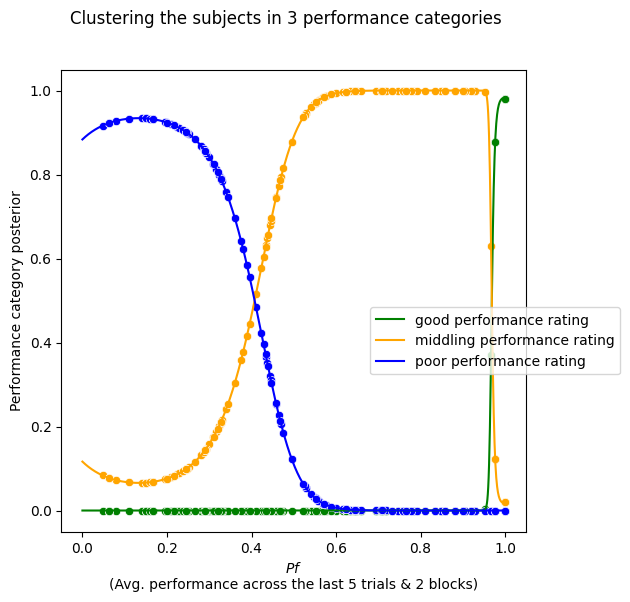

c:\Users\annic\OneDrive\Bureau\MainPhD\code\behavioural_exp_code\analysis_tools\dataframe_from_raw_data.py:348: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


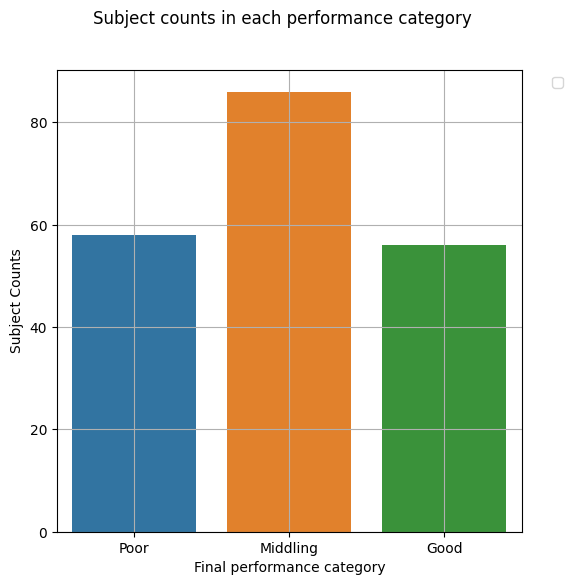

Index(['subject_id', 'task_code', 'lang', 'browser', 'N_trials', 'N_tmstps',
       'start_date', 'finish_date', 'finished_clock', 'completedTask',
       'N_exited_fullscreen', 'N_missed_actions', 'canvas_explore_points',
       'mandatory_q1', 'mandatory_q2', 'optional_q1', 'optional_q2',
       'optional_q3', 'canvas_size', 'Submission id', 'Participant id',
       'Status', 'Custom study tncs accepted at', 'Started at', 'Completed at',
       'Reviewed at', 'Archived at', 'Time taken', 'Completion code',
       'Total approvals', 'Fluent languages', 'Age', 'Sex',
       'Ethnicity simplified', 'Country of birth', 'Country of residence',
       'Nationality', 'Language', 'Student status', 'Employment status',
       'Nationality_red', 'feedback_noise_std',
       'application_measured_timetaken', 'question_0', 'question_1',
       'question_2', 'question_3', 'question_4', 'question_5', 'question_6',
       'question_7', 'raw_feedback_values', 'raw_realtime_values',
       'realtime_

In [67]:

import sys,os
import pickle

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly as pltly
import plotly.express as px
import plotly.graph_objects as go

from sklearn.mixture import GaussianMixture

from jax import vmap
import jax.numpy as jnp

# + local functions : 
from database_handling.database_extract import get_all_subject_data_from_internal_task_id
from utils import remove_by_indices
from analysis_tools.preprocess import get_preprocessed_data_from_df
from analysis_tools.dataframe_from_raw_data import get_full_dataframe_from_raw_data

LAST_T_TIMESTEPS = 5
LAST_K_TRIALS = 2

LLM_CLASSIFS_PATH = os.path.join("results","llm_classifications","cluster_11_03.data")

STUDIES_EXTRACTION_CODES_1 = {
    "study_1" : {
        "dict_code" : "002",
        "internal_task_id" : "002",
        "studies_id" : None,
        "exclude_subjects" : ["5c9cb670b472d0001295f377"],
        "feedback_noise_bins" : [0,0.2,0.4,1]
    }
}
subjects_df_1 = get_full_dataframe_from_raw_data(STUDIES_EXTRACTION_CODES_1,LLM_CLASSIFS_PATH,LAST_T_TIMESTEPS,LAST_K_TRIALS)


STUDIES_EXTRACTION_CODES_23 = {
    "study_2" : {
        "dict_code" : "003_1",
        "internal_task_id" : "003",
        "studies_id" :  ["66f96c31e69227986334a027","66d086503c0a69291c361b67"],
        "exclude_subjects" : ["615c1741d4630b25e6bc1cb9"],
        "feedback_noise_bins" : [0,0.05,0.15,1]
    },
    "study_3" : {
        "dict_code" : "003_2",
        "internal_task_id" : "003",
        "studies_id" : ["6703ab18d345eaa4893587e0","66f9aee8210357265a5958fc","6703ab1a7ea30557549dc6da"],
        "exclude_subjects" : ["611d60c383f4f70ff4bc99fd", "66a74bdfdcaccdc0703894d5",
                              "667d92f2ea5c1542f417285d", "6548f570022275786186ffbd"],
        "feedback_noise_bins" : [0,0.05,0.15,1]
    }
}


subjects_df_23,llm_qsts = get_full_dataframe_from_raw_data(STUDIES_EXTRACTION_CODES_23,LLM_CLASSIFS_PATH,LAST_T_TIMESTEPS,LAST_K_TRIALS,return_qsts=True)

full_dataframe = pd.concat([subjects_df_1,subjects_df_23],axis=0,ignore_index=True)
print(full_dataframe.keys())
print(full_dataframe[['Age']].describe())
print(full_dataframe[['application_measured_timetaken']].describe())

Text(0.175, 30, 'HIGH')

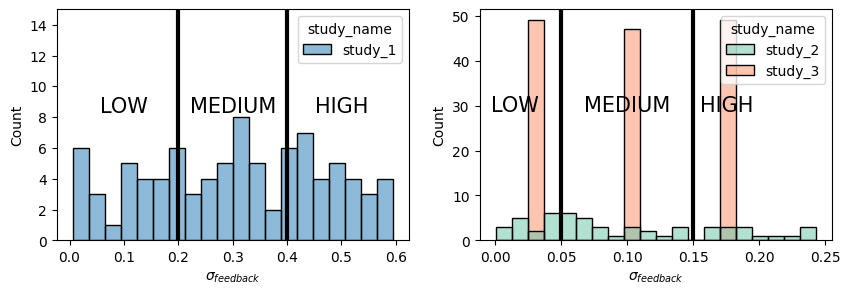

In [39]:
# for study in ['study_1','study_2','study_3']:

fig,axs = plt.subplots(1,2,figsize=(10,3))

ax = axs[0]
sns.histplot(ax=ax,data = full_dataframe[full_dataframe["study_name"]=="study_1"],x="feedback_noise_std",hue='study_name',bins=20)
ax.set_xlabel("$\sigma_{feedback}$")
ax.set_ylim([0,15])
y = 8.7

ax.text(0.1,y,"LOW".format(2),fontsize=15,horizontalalignment='center',
            verticalalignment='center',color="black")
ax.axvline(0.2,color='black',linewidth=3)
ax.text(0.3,y,"MEDIUM".format(2),fontsize=15,horizontalalignment='center',
            verticalalignment='center',color="black")
ax.axvline(0.4,color='black',linewidth=3)
ax.text(0.5,y,"HIGH".format(2),fontsize=15,horizontalalignment='center',
            verticalalignment='center',color="black")

ax = axs[1]
sns.histplot(ax=ax,data = full_dataframe[full_dataframe["study_name"]!="study_1"],x="feedback_noise_std",hue='study_name',bins=20,palette="Set2")
ax.set_xlabel("$\sigma_{feedback}$")
y = 30

ax.text(0.015,y,"LOW".format(2),fontsize=15,horizontalalignment='center',
            verticalalignment='center',color="black")
ax.axvline(0.05,color='black',linewidth=3)
ax.text(0.1,y,"MEDIUM".format(2),fontsize=15,horizontalalignment='center',
            verticalalignment='center',color="black")
ax.axvline(0.15,color='black',linewidth=3)
ax.text(0.175,y,"HIGH".format(2),fontsize=15,horizontalalignment='center',
            verticalalignment='center',color="black")


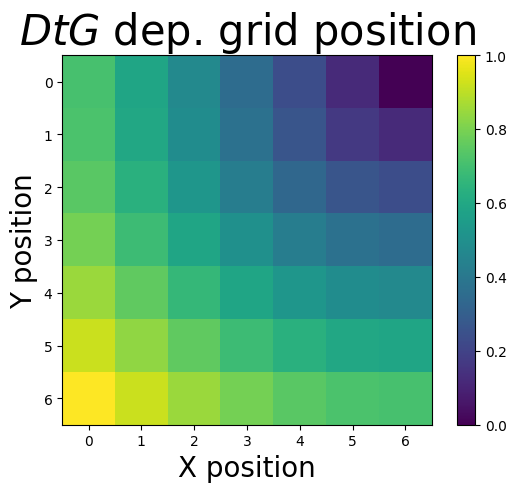

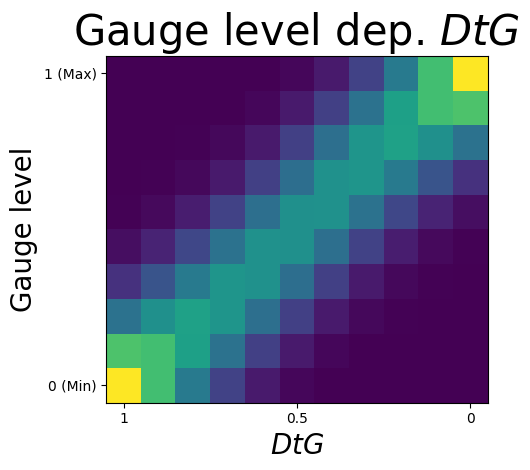

In [66]:
from functools import partial
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import plotly as pltly
import plotly.express as px
import plotly.graph_objects as go

from jax import vmap
import jax.numpy as jnp

from simulate.agents_utils import sub2ind,ind2sub,distance,discretized_distribution_from_value,discretize_normal_pdf
from functools import partial
n_feedback_ticks = 10

def euclidian_distance(position,goal):
    return jnp.linalg.norm(position-goal,2)

# Show the equivalent feedback matrices :
grid_size = (7,7)
end_idx = jnp.array([0,6])
flattened_grid = jnp.zeros(grid_size).flatten()
Ns = flattened_grid.shape[0]

maximum_euclidian_dist = euclidian_distance(jnp.array(grid_size) - jnp.ones((2,)),jnp.zeros((2,)))

all_scalar_fb_values = np.zeros((Ns,))
for idx,state in enumerate(flattened_grid):
    cellx,celly = ind2sub(grid_size,idx)
    distance_to_goal = euclidian_distance(jnp.array([cellx,celly]),end_idx)/maximum_euclidian_dist
    all_scalar_fb_values[idx] = distance_to_goal
fig,ax = plt.subplots()
im = ax.imshow(np.reshape(all_scalar_fb_values,grid_size))
fig.colorbar(im)
ax.set_title("$DtG$ dep. grid position",size=30)
ax.set_xlabel("X position",size=20)
ax.set_ylabel("Y position",size=20)
fig.savefig(os.path.join("results","plots",'gridpose_v_dtg.png'), transparent=True)


fig,ax = plt.subplots()
# annotate_axes(ax, 'std={}'.format(key))

# Sort distances :
Npoints = 11
linear_dist_to_goal = jnp.linspace(0,1,Npoints)
discretize_distance_normal_function = partial(discretize_normal_pdf,std=0.175,num_bins = n_feedback_ticks,lower_bound= -1e-5 ,upper_bound = 1.0 + 1e-5)
a0,edges = vmap(discretize_distance_normal_function,out_axes=-1)(1-linear_dist_to_goal)
im = ax.imshow(a0)

ax.set_xticks([0,int(Npoints/2),Npoints-1],[1,0.5,0])
ax.set_yticks([0,n_feedback_ticks-1],["1 (Max)","0 (Min)"])
# ax.set_title("Noisy feedback values \n depending on agent DtG")
ax.set_xlabel("$DtG$",size=20)
ax.set_ylabel("Gauge level",size=20)
ax.set_title("Gauge level dep. $DtG$",size=30)
fig.tight_layout()

fig.savefig(os.path.join("results","plots",'gauge_lvl_vs_dtg_0175.png'), transparent=True)